<a href="https://colab.research.google.com/github/Loon1/Knn-para-Diabetes/blob/main/AMTomorrows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importar as bibliotecas necessárias
import numpy as np # biblioteca para trabalhar com vetores, matrizes, etc
import pandas as pd # biblioteca para manipulação de dados
import seaborn as sns # biblioteca para visualização
from sklearn.preprocessing import StandardScaler # biblioteca para normalização dos dados
from collections import Counter # contar valores
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
data_Tr = pd.read_csv('Training.csv')
data_Tr.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
subset_Tr = data_Tr.copy()
subset_Tr = subset_Tr.loc[data_Tr['BloodPressure'] != 0]
subset_Tr.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2346.000000,2346.000000,2346.000000,2346.000000,2346.000000,2346.000000,2346.000000,2346.000000,2346.000000
mean,3.823103,121.573316,72.263853,21.416027,84.013214,32.182310,0.494398,32.874680,0.384910
std,3.268483,32.066601,11.821553,15.470861,118.194088,7.320505,0.367160,11.229438,0.486678
min,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.300000,0.254000,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.500000,48.000000,32.300000,0.382000,29.000000,0.000000
75%,6.000000,143.000000,80.000000,33.000000,130.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
subset_Tr = subset_Tr.loc[data_Tr['SkinThickness'] != 0]
subset_Tr.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000,1733.000000
mean,3.532602,120.122908,71.332372,28.991344,113.730525,32.519677,0.518595,31.114253,0.367571
std,3.315006,32.795317,11.640014,10.213395,124.629120,7.116801,0.387931,10.330211,0.482283
min,0.000000,0.000000,30.000000,7.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,21.000000,0.000000,27.600000,0.258000,23.000000,0.000000
50%,2.000000,113.000000,70.000000,30.000000,85.000000,32.700000,0.404000,28.000000,0.000000
75%,5.000000,142.000000,78.000000,36.000000,168.000000,36.600000,0.660000,36.000000,1.000000
max,17.000000,197.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
subset_Tr = subset_Tr.loc[data_Tr['BMI'] != 0]
subset_Tr.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,3.548986,120.151304,71.353623,29.019130,113.948406,32.670493,0.514317,31.161159,0.369275
std,3.313923,32.865273,11.658280,10.228888,124.849158,6.778923,0.382166,10.331096,0.482749
min,0.000000,0.000000,30.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,21.000000,0.000000,27.700000,0.256000,23.000000,0.000000
50%,2.000000,113.000000,70.000000,30.000000,85.000000,32.700000,0.403000,28.000000,0.000000
75%,5.000000,142.000000,78.000000,36.000000,168.000000,36.600000,0.660000,37.000000,1.000000
max,17.000000,197.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
subset_Tr = subset_Tr.loc[data_Tr['Glucose'] != 0]
subset_Tr.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000
mean,3.562646,121.347190,71.369438,29.038642,115.015222,32.676230,0.516391,31.211358,0.370023
std,3.322563,30.751923,11.663810,10.255764,125.003605,6.784035,0.383405,10.346280,0.482952
min,0.000000,57.000000,30.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,21.000000,0.000000,27.675000,0.256000,24.000000,0.000000
50%,2.000000,113.000000,70.000000,30.000000,85.000000,32.750000,0.407000,28.000000,0.000000
75%,5.000000,142.000000,78.000000,36.000000,168.000000,36.600000,0.660000,36.250000,1.000000
max,17.000000,197.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


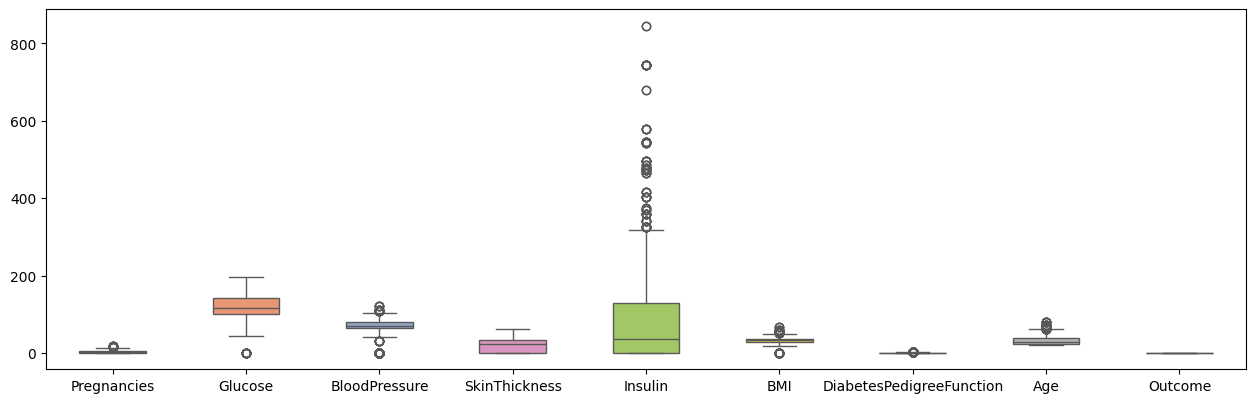

In [ ]:
plot_custom_boxplot(data_Tr)

In [ ]:
def remove_outliers(dataframe):
    remove_indices = []
    for column in dataframe.columns:

        outliers = boxplot_stats(dataframe[column]).pop(0)['fliers']

        outliers_indices = np.where(np.in1d(dataframe[column], outliers))[0]

        remove_indices.extend(outliers_indices)


    remove_indices = np.unique(remove_indices)


    cleaned_dataframe = dataframe.drop(dataframe.index[remove_indices])

    return cleaned_dataframe

In [ ]:
def plot_custom_boxplot(data):


    fig, ax = plt.subplots(figsize=(10, 6))

    sns.boxplot(data=data, orient="v", palette="Set2", width=0.5, ax=ax)


    plt.subplots_adjust(left=0, right=1.2, top=0.9, bottom=0.3)


    plt.show()

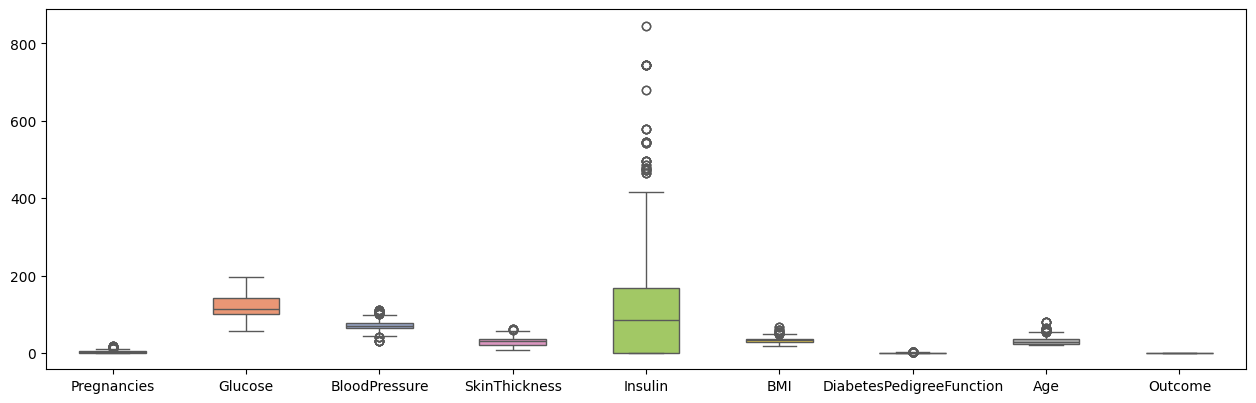

In [ ]:
plot_custom_boxplot(subset_Tr)

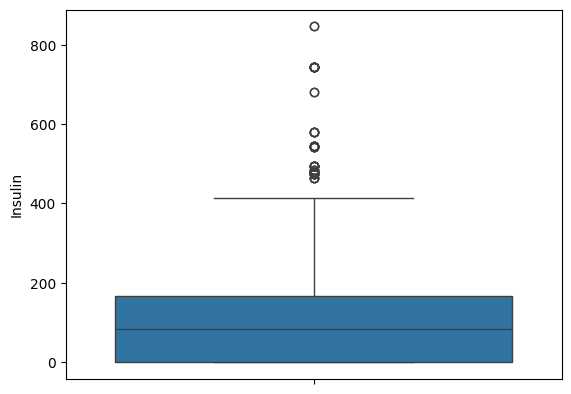

In [ ]:
ax = sns.boxplot(data=subset_Tr['Insulin'], orient="v")


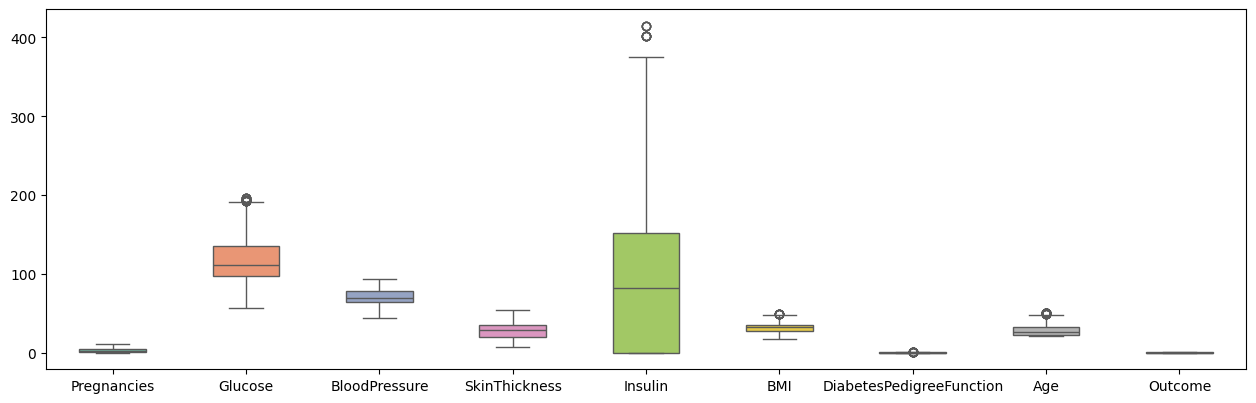

In [ ]:
data_Tr_sem_outliers = remove_outliers(subset_Tr)
plot_custom_boxplot(data_Tr_sem_outliers)

In [ ]:
data_Tr_sem_outliers.shape[0]

1430

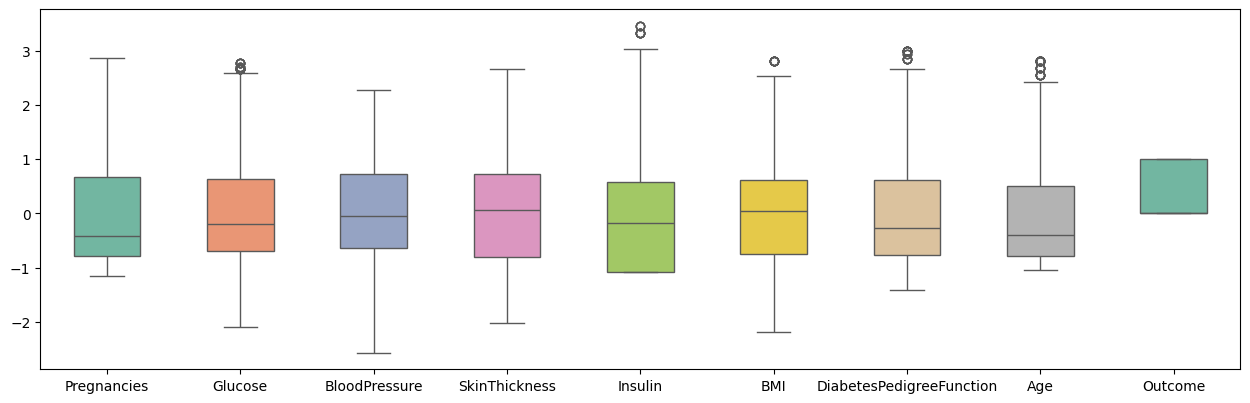

In [ ]:
data_Tr_sem_outliers_reset = data_Tr_sem_outliers.reset_index(drop=True)

data_Tr_semOutcome = data_Tr_sem_outliers_reset.drop(columns=['Outcome'])

scaler = StandardScaler().fit(data_Tr_semOutcome)
norm_subset = pd.DataFrame(scaler.transform(data_Tr_semOutcome), columns=data_Tr_semOutcome.columns)

norm_subset['Outcome'] = data_Tr_sem_outliers_reset['Outcome']

plot_custom_boxplot(norm_subset)

In [ ]:
remove_out2 = []
for column in norm_subset.columns:

    outliers = boxplot_stats(norm_subset[column]).pop(0)['fliers']

    outliers_indices = np.where(np.in1d(norm_subset[column], outliers))[0]

    remove_out2.extend(outliers_indices)

In [ ]:
remove_out2 = np.array(remove_out2)
remove_out2 = np.unique(remove_out2)
remove_out2

array([   0,    4,    9,   53,   83,   99,  120,  128,  134,  135,  142,
        156,  162,  195,  201,  220,  224,  260,  295,  302,  315,  345,
        390,  402,  411,  433,  445,  450,  457,  464,  475,  514,  540,
        546,  555,  564,  578,  605,  609,  613,  628,  649,  657,  678,
        682,  704,  709,  727,  736,  754,  757,  760,  780,  843,  884,
        885,  889,  894,  896,  912,  926,  936,  944,  950,  962,  981,
        982,  994, 1006, 1028, 1042, 1044, 1050, 1067, 1102, 1147, 1151,
       1188, 1197, 1201, 1226, 1227, 1231, 1235, 1244, 1246, 1248, 1261,
       1262, 1265, 1274, 1279, 1282, 1288, 1299, 1311, 1333, 1349, 1352,
       1363, 1371, 1372, 1382, 1402, 1405])

In [ ]:
quan_outlier = len(remove_out2)
quan_outlier

105

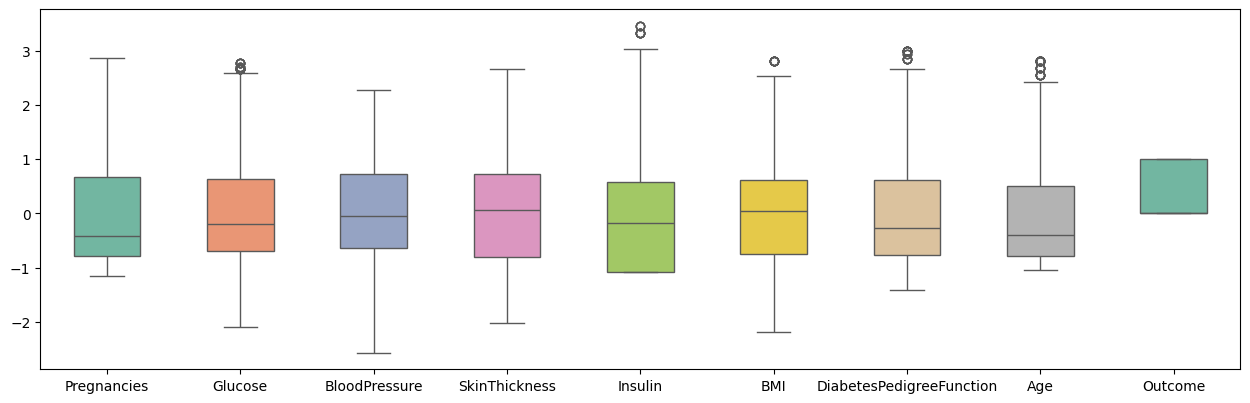

In [ ]:
plot_custom_boxplot(norm_subset)


In [ ]:
testing_data = pd.read_csv('Testing.csv')

In [ ]:
testing_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,3.863636,119.983766,69.503247,20.694805,77.724026,31.865909,0.445042,33.730519,0.301948
std,3.381437,31.186260,19.555067,16.298250,106.528025,7.427594,0.297660,12.208374,0.459850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,97.750000,62.000000,0.000000,0.000000,27.400000,0.228250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.348000,29.000000,0.000000
75%,6.000000,136.000000,80.000000,32.000000,127.750000,36.425000,0.600000,42.000000,1.000000
max,13.000000,199.000000,114.000000,99.000000,600.000000,57.300000,1.699000,70.000000,1.000000


In [ ]:

testing_data_reset = testing_data.reset_index(drop=True)

testing_data_semOutcome = testing_data_reset.drop(columns=['Outcome'])

scaler = StandardScaler().fit(testing_data_semOutcome)
testing_subset = pd.DataFrame(scaler.transform(testing_data_semOutcome), columns=testing_data_semOutcome.columns)

testing_subset['Outcome'] = testing_data_reset['Outcome']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train = norm_subset.drop(columns=['Outcome', 'Pregnancies'])
y_train = norm_subset['Outcome']

X_test = testing_subset.drop(columns=['Outcome', 'Pregnancies'])
y_test = testing_subset['Outcome']
best_accuracy = 0
best_k = 0

for k in range(1, 500):

    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Melhor acurácia encontrada:", best_accuracy)
print("Melhor número de vizinhos:", best_k)

Melhor acurácia encontrada: 0.788961038961039
Melhor número de vizinhos: 75


In [ ]:
X_train = norm_subset.drop(columns=['Outcome'])
y_train = norm_subset['Outcome']

X_test = testing_subset.drop(columns=['Outcome'])
y_test = testing_subset['Outcome']
best_accuracy = 0
best_k = 0

for k in range(1, 500):

    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Melhor acurácia encontrada:", best_accuracy)
print("Melhor número de vizinhos:", best_k)

Melhor acurácia encontrada: 0.7792207792207793
Melhor número de vizinhos: 86


In [ ]:
norm_subset.shape[0]

1430

In [ ]:
testing_subset.shape[0]

308

In [ ]:
X_train = data_Tr.drop(columns=['Outcome'])
y_train = data_Tr['Outcome']

X_test = testing_data.drop(columns=['Outcome'])
y_test = testing_data['Outcome']
best_accuracy = 0
best_k = 0

for k in range(1, 500):

    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Melhor acurácia encontrada:", best_accuracy)
print("Melhor número de vizinhos:", best_k)

Melhor acurácia encontrada: 0.788961038961039
Melhor número de vizinhos: 72


In [ ]:
data_Tr.shape[0]

2460

In [ ]:
testing_data.shape[0]

308

In [ ]:

X_train = data_Tr.drop(columns=['Outcome', 'Pregnancies'])
y_train = data_Tr['Outcome']

X_test = testing_data.drop(columns=['Outcome', 'Pregnancies'])
y_test = testing_data['Outcome']
best_accuracy = 0
best_k = 0

for k in range(1, 500):

    knn_classifier = KNeighborsClassifier(n_neighbors=k)


    knn_classifier.fit(X_train, y_train)


    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Melhor acurácia encontrada:", best_accuracy)
print("Melhor número de vizinhos:", best_k)

Melhor acurácia encontrada: 0.7727272727272727
Melhor número de vizinhos: 72


In [ ]:
data_Tr_sem_outliers.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1430.000000,1430.000000,1430.000000,1430.000000,1430.00000,1430.000000,1430.000000,1430.000000,1430.000000
mean,3.151748,116.858042,70.546154,27.944755,98.49021,31.948042,0.451739,29.084615,0.323776
std,2.744046,28.565618,10.321781,9.827435,91.49200,6.309519,0.258802,7.799121,0.468079
min,0.000000,57.000000,44.000000,8.000000,0.00000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,20.000000,0.00000,27.200000,0.254000,23.000000,0.000000
50%,2.000000,111.000000,70.000000,28.500000,82.00000,32.250000,0.380000,26.000000,0.000000
75%,5.000000,135.000000,78.000000,35.000000,152.00000,35.800000,0.613000,33.000000,1.000000
max,11.000000,196.000000,94.000000,54.000000,415.00000,49.700000,1.224000,51.000000,1.000000


In [ ]:
subset_Tr2 = data_Tr.copy().copy()


In [ ]:
subset_Tr2.loc[subset_Tr2['Glucose'] == 0, 'Glucose'] = 111
subset_Tr2.loc[subset_Tr2['BloodPressure'] == 0, 'BloodPressure'] = 29
subset_Tr2.loc[subset_Tr2['BMI'] == 0, 'BMI'] = 32.3
subset_Tr2.loc[subset_Tr2['DiabetesPedigreeFunction'] == 0, 'DiabetesPedigreeFunction'] = 0.381000

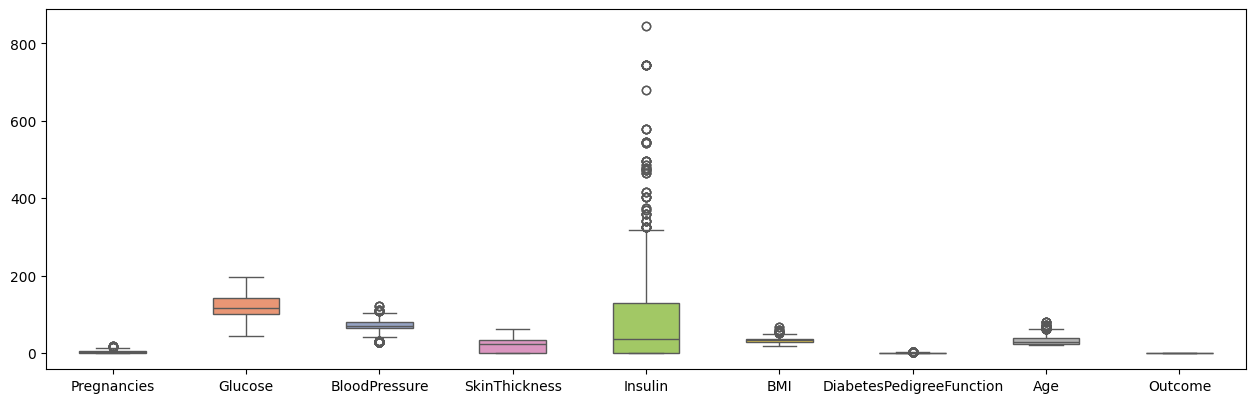

In [ ]:
plot_custom_boxplot(subset_Tr2)


In [ ]:
subset_Tr2_sem_outliers = remove_outliers(subset_Tr2)

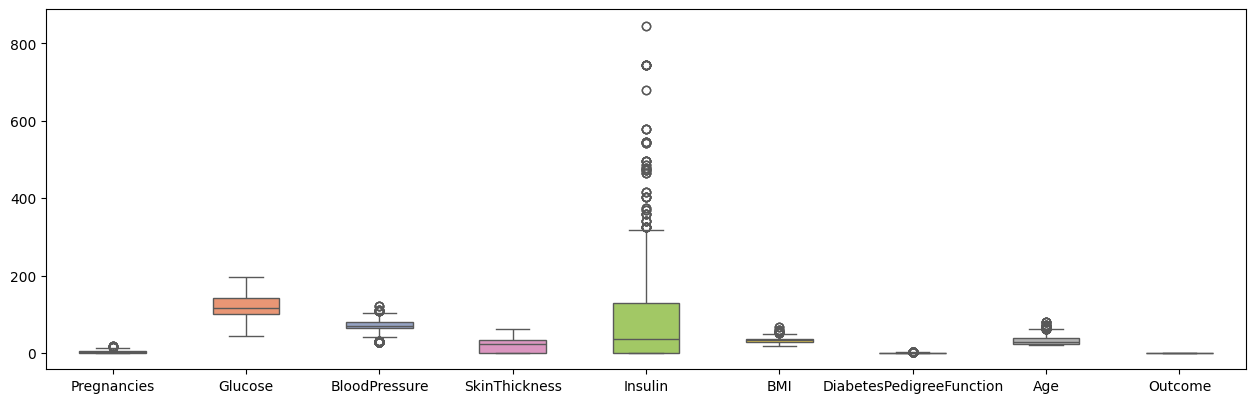

In [ ]:
plot_custom_boxplot(subset_Tr2)


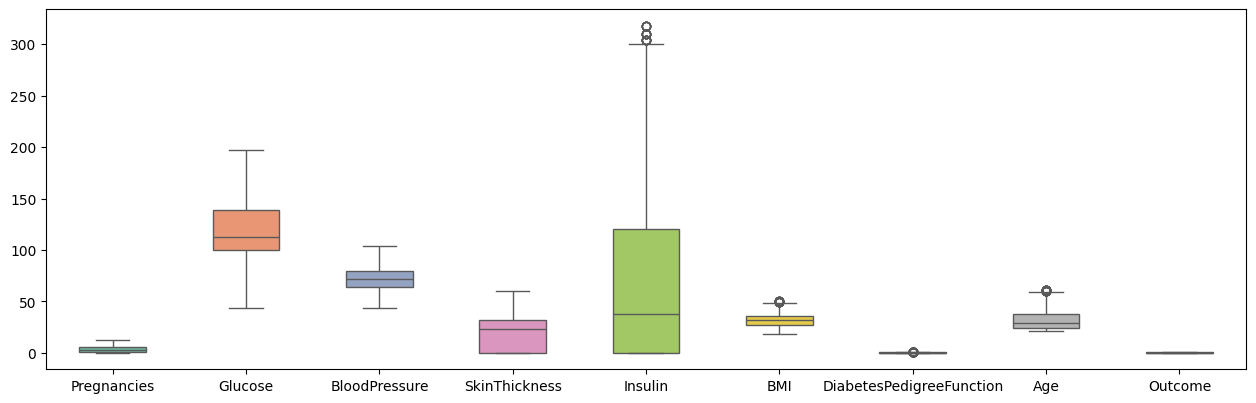

In [ ]:
plot_custom_boxplot(subset_Tr2_sem_outliers)


In [ ]:
subset_Tr2_sem_outliers.shape[0]

2053

In [ ]:
X_train = subset_Tr2_sem_outliers.drop(columns=['Outcome'])
y_train = subset_Tr2_sem_outliers['Outcome']

X_test = testing_data.drop(columns=['Outcome'])
y_test = testing_data['Outcome']
best_accuracy = 0
best_k = 0


for k in range(1, 250):

    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k


print("Melhor acurácia encontrada:", best_accuracy)
print("Melhor número de vizinhos:", best_k)

Melhor acurácia encontrada: 0.7857142857142857
Melhor número de vizinhos: 245


In [ ]:
subset_Tr2_sem_outliers2 = remove_outliers(subset_Tr2_sem_outliers)

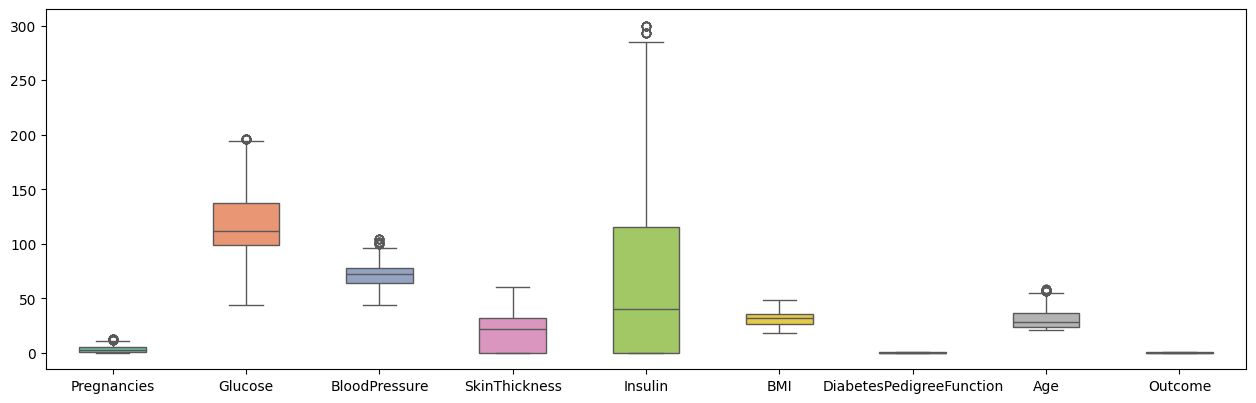

In [ ]:
plot_custom_boxplot(subset_Tr2_sem_outliers2)

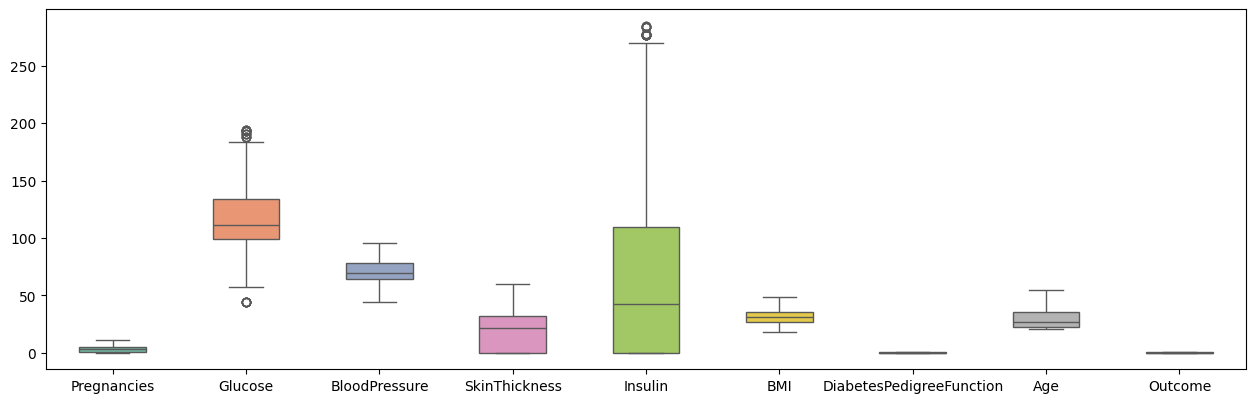

In [ ]:
subset_Tr2_sem_outliers3 = remove_outliers(subset_Tr2_sem_outliers2)
plot_custom_boxplot(subset_Tr2_sem_outliers3)

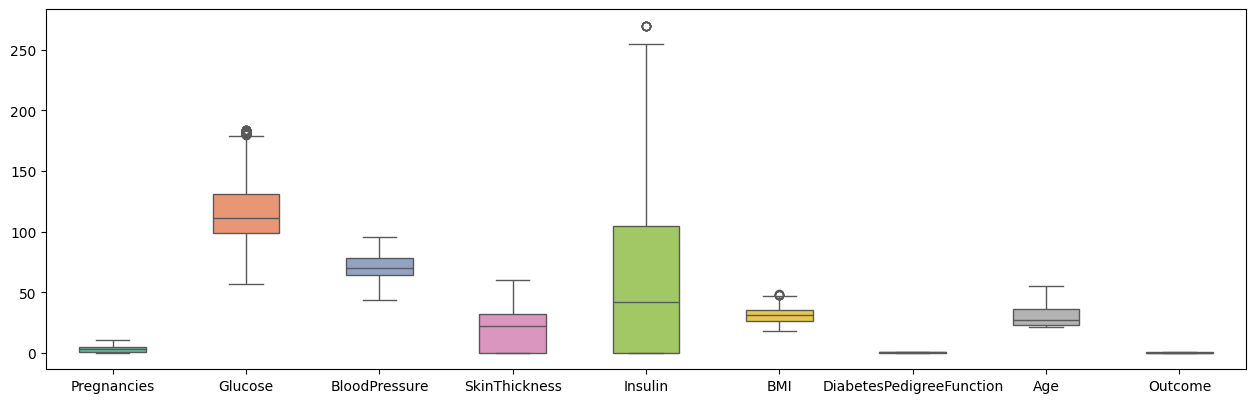

In [ ]:
subset_Tr2_sem_outliers4 = remove_outliers(subset_Tr2_sem_outliers3)
plot_custom_boxplot(subset_Tr2_sem_outliers4)

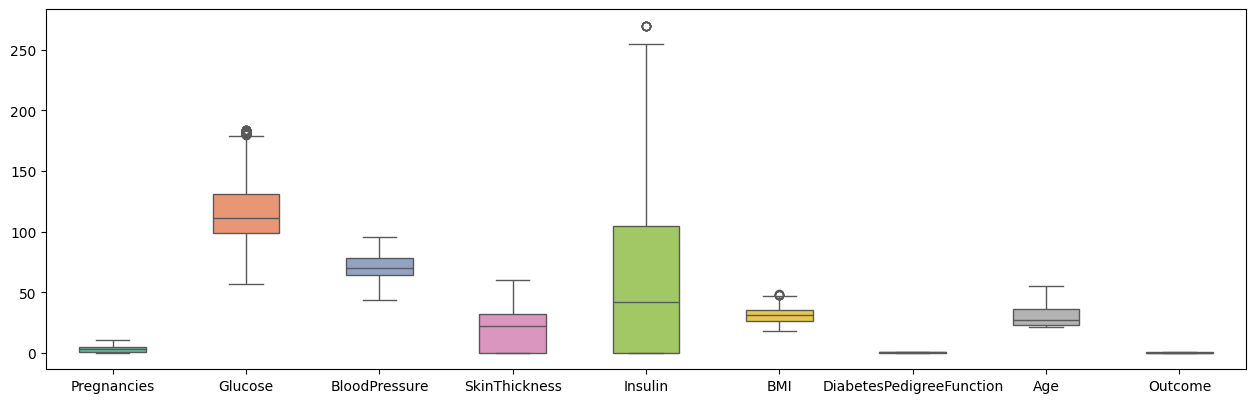

In [ ]:
subset_Tr2_sem_outliers4 = remove_outliers(subset_Tr2_sem_outliers3)
plot_custom_boxplot(subset_Tr2_sem_outliers4)

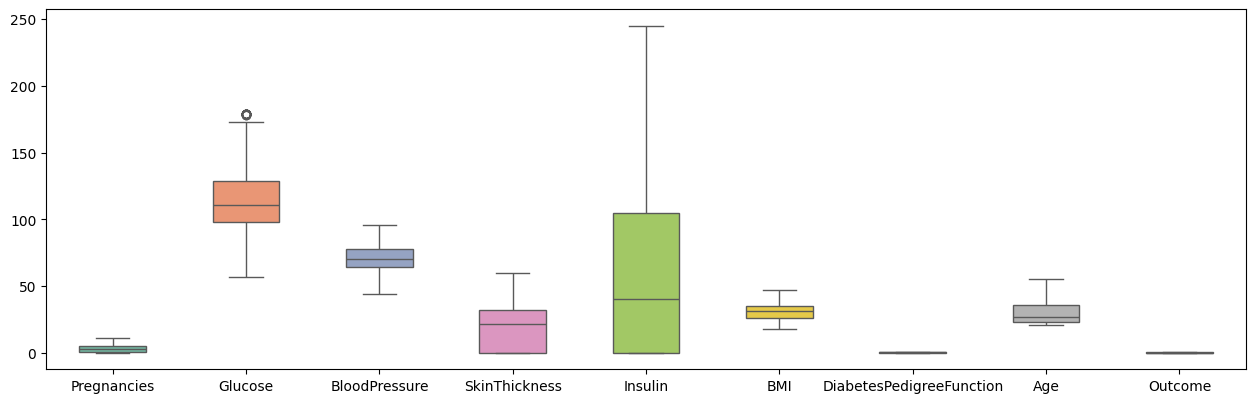

In [ ]:
subset_Tr2_sem_outliers5 = remove_outliers(subset_Tr2_sem_outliers4)
plot_custom_boxplot(subset_Tr2_sem_outliers5)

In [ ]:
subset_Tr2_sem_outliers5.shape[0]

1714

In [ ]:
X_train = subset_Tr2_sem_outliers5.drop(columns=['Outcome'])
y_train = subset_Tr2_sem_outliers5['Outcome']

X_test = testing_data.drop(columns=['Outcome'])
y_test = testing_data['Outcome']
best_accuracy = 0
best_k = 0

for k in range(1, 700):

    knn_classifier = KNeighborsClassifier(n_neighbors=k)


    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Melhor acurácia encontrada:", best_accuracy)
print("Melhor número de vizinhos:", best_k)

Melhor acurácia encontrada: 0.788961038961039
Melhor número de vizinhos: 235


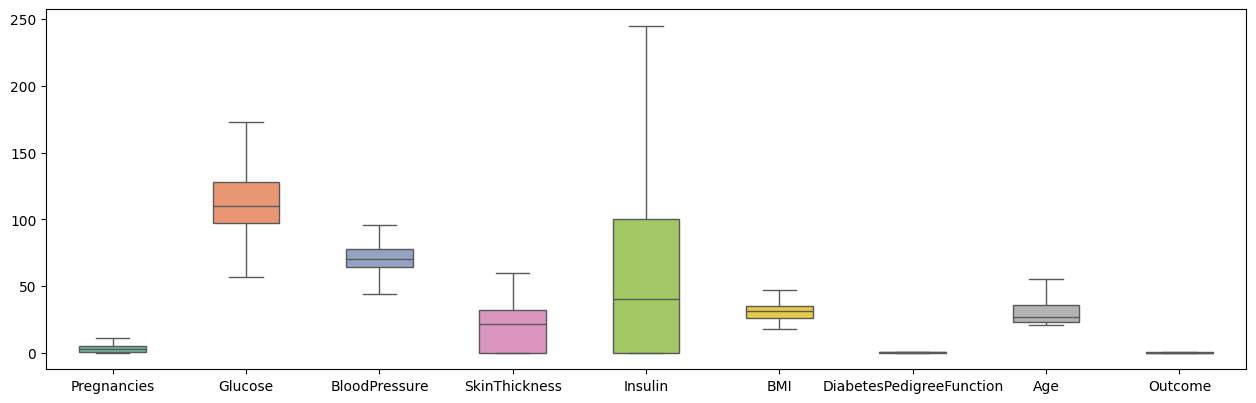

In [ ]:
subset_Tr2_sem_outliers6 = remove_outliers(subset_Tr2_sem_outliers5)
plot_custom_boxplot(subset_Tr2_sem_outliers6)

In [ ]:
X_train = subset_Tr2_sem_outliers6.drop(columns=['Outcome'])
y_train = subset_Tr2_sem_outliers6['Outcome']

X_test = testing_data.drop(columns=['Outcome'])
y_test = testing_data['Outcome']
best_accuracy = 0
best_k = 0

for k in range(1, 700):

    knn_classifier = KNeighborsClassifier(n_neighbors=k)


    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Melhor acurácia encontrada:", best_accuracy)
print("Melhor número de vizinhos:", best_k)

Melhor acurácia encontrada: 0.7792207792207793
Melhor número de vizinhos: 182


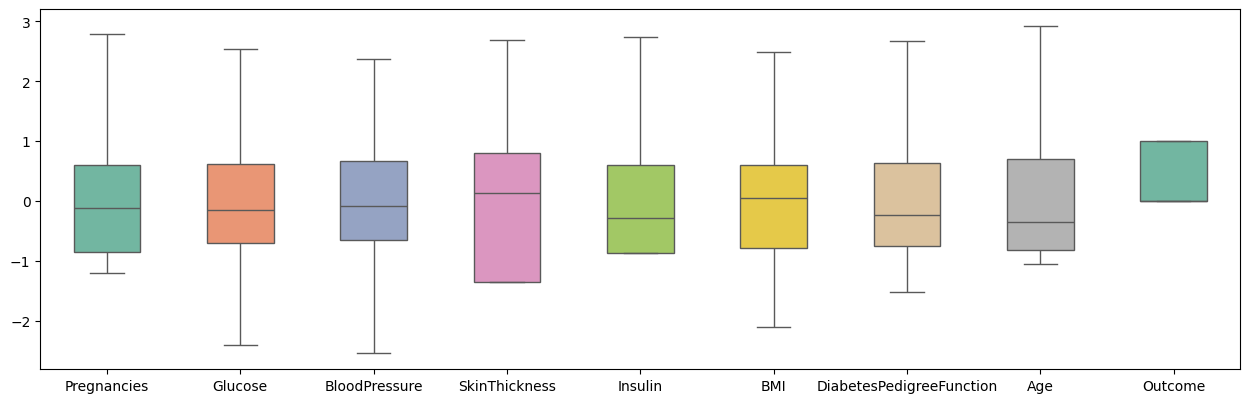

In [ ]:
data_Tr2_sem_outliers_reset = subset_Tr2_sem_outliers6.reset_index(drop=True)
data_Tr2_semOutcome = data_Tr2_sem_outliers_reset.drop(columns=['Outcome'])
scaler = StandardScaler().fit(data_Tr2_semOutcome)
norm2_subset = pd.DataFrame(scaler.transform(data_Tr2_semOutcome), columns=data_Tr2_semOutcome.columns)
norm2_subset['Outcome'] = data_Tr2_sem_outliers_reset['Outcome']

plot_custom_boxplot(norm2_subset)

In [ ]:
X_train = norm2_subset.drop(columns=['Outcome'])
y_train = norm2_subset['Outcome']

X_test = testing_subset.drop(columns=['Outcome'])
y_test = testing_subset['Outcome']
best_accuracy = 0
best_k = 0

for k in range(1, 700):

    knn_classifier = KNeighborsClassifier(n_neighbors=k)


    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Melhor acurácia encontrada:", best_accuracy)
print("Melhor número de vizinhos:", best_k)

Melhor acurácia encontrada: 0.75
Melhor número de vizinhos: 197
